In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("banddaniel/musk-v2-multiple-instance-learning-data")

print("Path to dataset files:", path)

Path to dataset files: /home/laq275/.cache/kagglehub/datasets/banddaniel/musk-v2-multiple-instance-learning-data/versions/1


In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [23]:
file_path = "/home/laq275/.cache/kagglehub/datasets/banddaniel/musk-v2-multiple-instance-learning-data/versions/1/musk2-10-proc1_ csv/nweka-musk2-10-2tra.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6486 entries, 0 to 6485
Columns: 169 entries, Unnamed: 0 to label
dtypes: float64(166), int64(2), object(1)
memory usage: 8.4+ MB


In [25]:
df.shape

(6486, 169)

In [26]:
df.select_dtypes(include=[np.number])

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,label
0,0,51.0,-126.0,-24.0,-73.0,-117.0,76.0,-161.0,73.0,-237.0,...,-293.0,63.0,-13.0,-27.0,108.0,172.0,-44.0,-116.0,119.0,1
1,1,44.0,-106.0,-20.0,-75.0,-117.0,84.0,-166.0,58.0,-232.0,...,-237.0,69.0,-9.0,150.0,128.0,160.0,-66.0,-145.0,-4.0,1
2,2,37.0,-120.0,-132.0,34.0,-117.0,-100.0,61.0,-13.0,44.0,...,-194.0,-203.0,-9.0,23.0,111.0,195.0,-55.0,-149.0,112.0,1
3,3,48.0,-187.0,-131.0,29.0,-117.0,-87.0,62.0,-6.0,38.0,...,-212.0,-207.0,14.0,155.0,131.0,188.0,-72.0,-173.0,12.0,1
4,4,44.0,-101.0,-19.0,-47.0,-117.0,51.0,-168.0,58.0,-216.0,...,-71.0,64.0,-8.0,150.0,130.0,159.0,-66.0,-145.0,-5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6481,6481,44.0,-104.0,-19.0,-92.0,-117.0,21.0,-164.0,300.0,-229.0,...,-218.0,30.0,-8.0,150.0,129.0,156.0,-66.0,-142.0,-2.0,0
6482,6482,15.0,-110.0,-20.0,37.0,-117.0,87.0,-66.0,61.0,-134.0,...,-290.0,-201.0,-26.0,-19.0,67.0,265.0,-63.0,-243.0,85.0,0
6483,6483,16.0,-114.0,-21.0,38.0,-117.0,73.0,-48.0,-6.0,-128.0,...,-268.0,-205.0,-26.0,-18.0,67.0,264.0,-64.0,-243.0,82.0,0
6484,6484,21.0,-111.0,-20.0,156.0,-117.0,-60.0,-49.0,-13.0,-127.0,...,-253.0,-185.0,-26.0,-24.0,66.0,265.0,-64.0,-244.0,80.0,0


In [27]:
df = pd.read_csv(file_path, header=None)
X = df.iloc[:, 2:168].values  # Features (166 dimensions)
Y = df.iloc[:, 168].values    # Class labels

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/tmp/ipykernel_8632/3139269018.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None)


ValueError: could not convert string to float: 'f1'

In [ ]:
X

array([['51.0', '-126.0', '-24.0', ..., '-44.0', '-116.0', '119.0'],
       ['44.0', '-106.0', '-20.0', ..., '-66.0', '-145.0', '-4.0'],
       ['37.0', '-120.0', '-132.0', ..., '-55.0', '-149.0', '112.0'],
       ...,
       [16.0, -114.0, -21.0, ..., -64.0, -243.0, 82.0],
       [21.0, -111.0, -20.0, ..., -64.0, -244.0, 80.0],
       [23.0, -107.0, -20.0, ..., -64.0, -243.0, 83.0]],
      shape=(6486, 166), dtype=object)

Dataset shape: (6486, 167)
Variance explained by 2 PCs: 0.47
Silhouette Score (166D): 0.25
Silhouette Score (2D PCA): 0.58
Silhouette Score (50D Subspace): 0.26


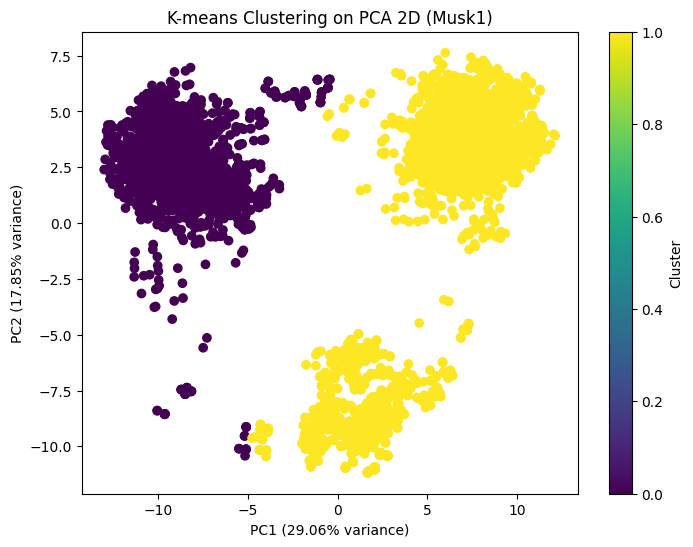


Clustering Performance Comparison:
                Method  Silhouette Score
0            Full 166D          0.251919
1               PCA 2D          0.584185
2  Random Subspace 50D          0.257981


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv(file_path)

data.columns = [f'f{i}' for i in range(1, 169)] + ['class']

# Drop the class column for unsupervised clustering
X = data.drop(columns=['class'])

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number])
print(f"Dataset shape: {X.shape}")  # Should be (476, 166)

# Standardize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 2: PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(f"Variance explained by 2 PCs: {sum(pca.explained_variance_ratio_):.2f}")

# Step 3: K-means Clustering

# (a) Original 166D space
kmeans_full = KMeans(n_clusters=2, random_state=42)
labels_full = kmeans_full.fit_predict(X_scaled)
score_full = silhouette_score(X_scaled, labels_full)
print(f"Silhouette Score (166D): {score_full:.2f}")

# (b) PCA 2D space
kmeans_pca = KMeans(n_clusters=2, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_df)
score_pca = silhouette_score(X_pca_df, labels_pca)
print(f"Silhouette Score (2D PCA): {score_pca:.2f}")

# (c) Random subspace (50 features)
np.random.seed(42)
subspace_cols = np.random.choice(X_scaled.columns, 50, replace=False)
X_subspace = X_scaled[subspace_cols]
kmeans_sub = KMeans(n_clusters=2, random_state=42)
labels_sub = kmeans_sub.fit_predict(X_subspace)
score_sub = silhouette_score(X_subspace, labels_sub)
print(f"Silhouette Score (50D Subspace): {score_sub:.2f}")

# Step 4: Visualize PCA 2D result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=labels_pca, cmap='viridis')
plt.title("K-means Clustering on PCA 2D (Musk1)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.colorbar(label='Cluster')
plt.show()

# Summary of Results
results = pd.DataFrame({
    'Method': ['Full 166D', 'PCA 2D', 'Random Subspace 50D'],
    'Silhouette Score': [score_full, score_pca, score_sub]
})
print("\nClustering Performance Comparison:")
print(results)

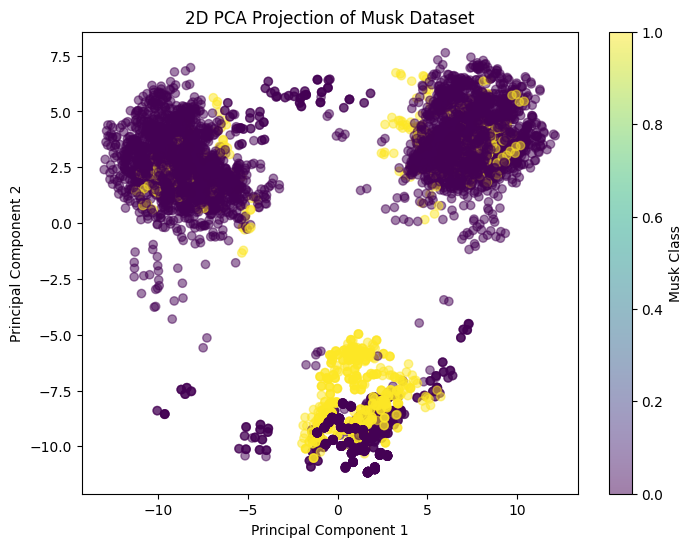

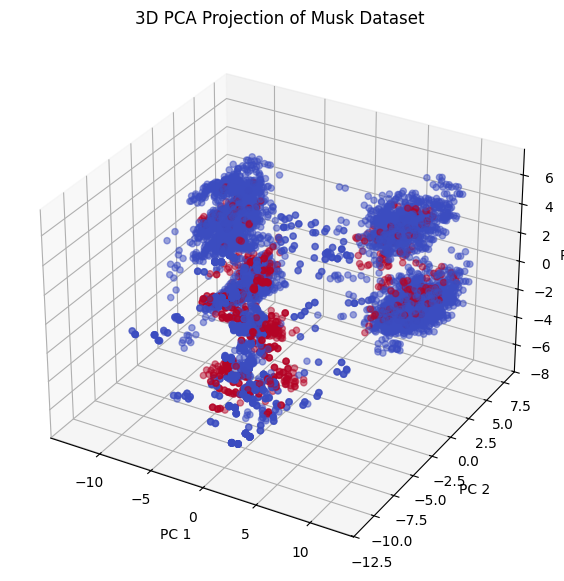

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
 # Update with your file path
df = pd.read_csv(file_path)

# Drop non-numeric columns (if any)
df = df.select_dtypes(include=[np.number])

# Separate features and target variable
X = df.iloc[:, :-1]  # Features (all except last column)
y = df.iloc[:, -1]   # Target variable (last column)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot 2D PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Musk Dataset")
plt.colorbar(label="Musk Class")
plt.show()

# Apply PCA for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Plot 3D PCA result
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='coolwarm', alpha=0.5)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("3D PCA Projection of Musk Dataset")
plt.show()


/tmp/ipykernel_8632/2621254547.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bx-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(K_range, distortions, 'bx-', linestyle="-", marker="x", color="blue")
/tmp/ipykernel_8632/2621254547.py:38: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(K_range, distortions, 'bx-', linestyle="-", marker="x", color="blue")
/tmp/ipykernel_8632/2621254547.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K_range, distortions, 'bx-', linestyle="-", marker="x", color="blue")


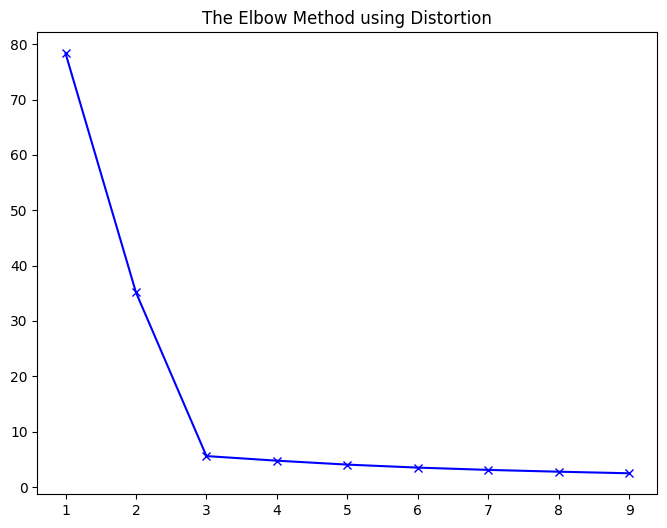

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv(file_path)

# Drop non-numeric columns (if any)
df = df.select_dtypes(include=[np.number])

# Separate features and target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target (musk or not)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction (2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Find optimal K using the Elbow Method
distortions = []
K_range = range(1, 10)  # Test K from 1 to 9

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_kmeans =kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_ / len(X_scaled))  # Inertia = Sum of squared distances to centroids


# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, 'bx-', linestyle="-", marker="x", color="blue")
plt.title("The Elbow Method using Distortion")
plt.show()


Silhouette Scores :
K-Means: 0.252
DBSCAN: 0.057


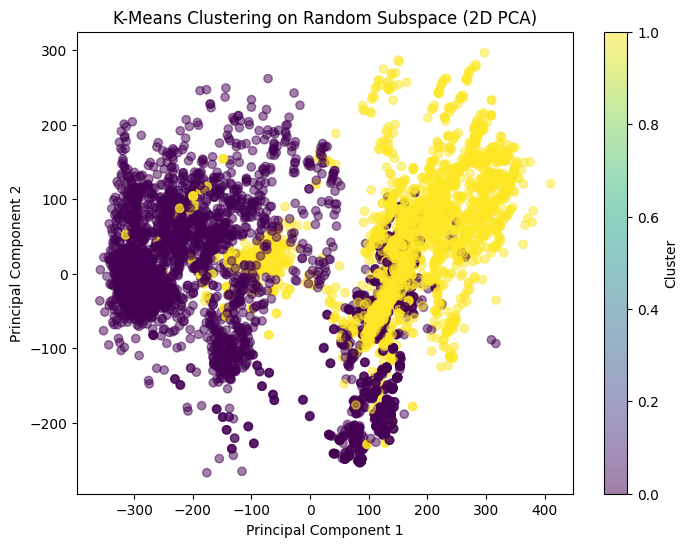

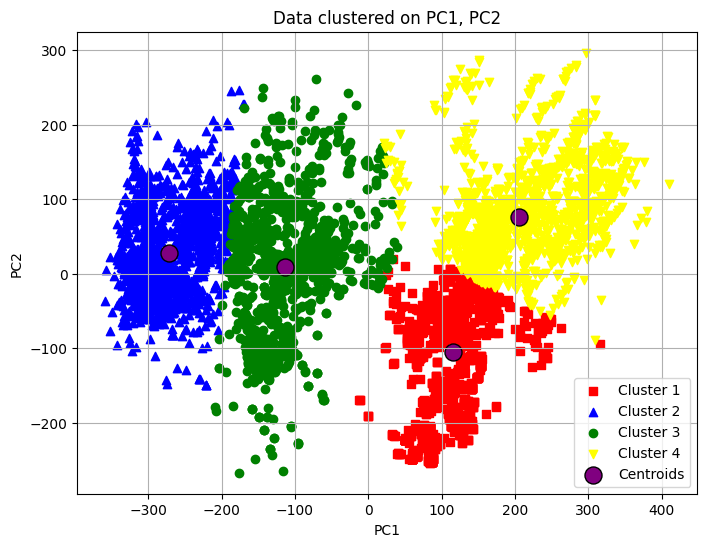

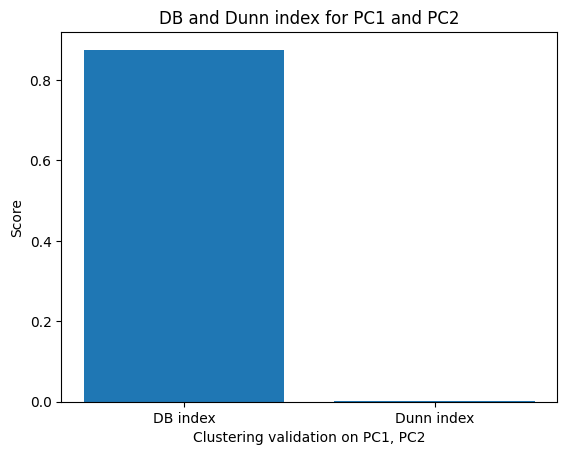

Davies-Bouldin Index: 0.8755203767195763
Dunn Index: 0.0010336130458130598


In [34]:
import random
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score
df = pd.read_csv(file_path)
from scipy.spatial.distance import cdist
# Drop non-numeric columns
df = df.select_dtypes(include=[np.number])

# Separate features and target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target (musk or not)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select a random subspace (random 20 features)
random_features = np.random.choice(df.columns, 8, replace=False)
X_subspace = df[random_features].values

# Apply Clustering on the Subspace Data
labels_kmeans_sub = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(X_scaled)
labels_dbscan_sub = DBSCAN(eps=1.0, min_samples=10).fit_predict(X_scaled)

# # Compute Silhouette Scores
silhouette_kmeans_sub = silhouette_score(X_scaled, labels_kmeans_sub)
silhouette_dbscan_sub = silhouette_score(X_scaled, labels_dbscan_sub) if len(set(labels_dbscan_sub)) > 1 else -1

print("\nSilhouette Scores :")
print(f"K-Means: {silhouette_kmeans_sub:.3f}")
print(f"DBSCAN: {silhouette_dbscan_sub:.3f}")

# Apply PCA (2D Visualization for Subspace)
pca_sub = PCA(n_components=2)
X_pca_sub = pca_sub.fit_transform(X_subspace)

# Plot K-Means Clustering on Random Subspace
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_sub[:, 0], X_pca_sub[:, 1], c=labels_kmeans_sub, cmap='viridis', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on Random Subspace (2D PCA)")
plt.colorbar(label="Cluster")
plt.show()

pc1 = X_pca_sub[:, 0]  # Second principal component
pc2 = X_pca_sub[:, 1]  # Fifth principal component

# Apply K-Means Clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_pca_sub)
centroids = kmeans.cluster_centers_[:, [0, 1]]  # Get centroids in PC2, PC5 space

# Plot the clustered data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'yellow']
markers = ['s', '^', 'o', 'v']
for i in range(k):
    plt.scatter(pc1[labels == i], pc2[labels == i], 
                c=colors[i], marker=markers[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='purple', marker='o', s=150, edgecolors='black', label='Centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data clustered on PC1, PC2')
plt.legend()
plt.grid()
plt.show()


selected_components = X_pca_sub[:, [0, 1]]

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(selected_components, labels)

# Compute Dunn Index
def dunn_index(X, labels):
    clusters = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []

    for i in clusters:
        cluster_i = X[labels == i]
        for j in clusters:
            if i != j:
                cluster_j = X[labels == j]
                inter_cluster_distances.append(np.min(cdist(cluster_i, cluster_j)))

        intra_cluster_distances.append(np.max(cdist(cluster_i, cluster_i)))

    return min(inter_cluster_distances) / max(intra_cluster_distances)


dunn_index_value = dunn_index(selected_components, labels)

# Plot validation metrics
metrics = {'DB index': db_index, 'Dunn index': dunn_index_value}
plt.bar(metrics.keys(), metrics.values())
plt.xlabel("Clustering validation on PC1, PC2")
plt.ylabel("Score")
plt.title("DB and Dunn index for PC1 and PC2")
plt.show()

# Print values
print(f"Davies-Bouldin Index: {db_index}")

print(f"Dunn Index: {dunn_index_value}")

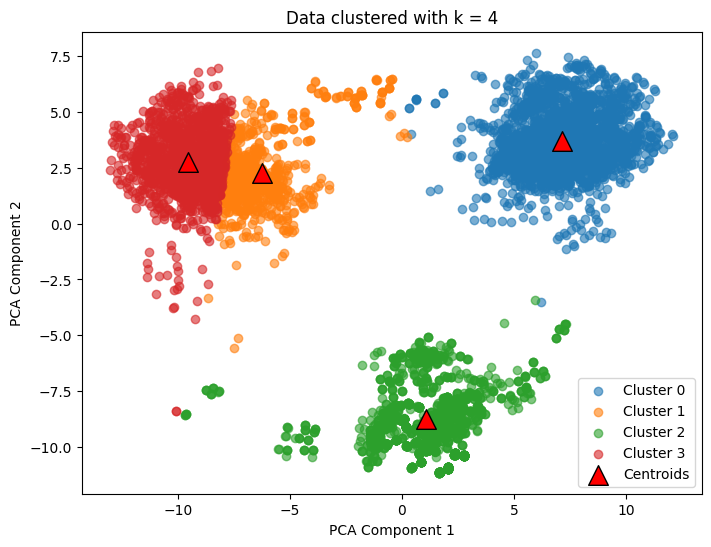

In [ ]:
df = pd.read_csv(file_path)

# Select only numeric columns
df = df.select_dtypes(include=[np.number])

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means clustering with k=7
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Scatter plot of clustered data
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}', alpha=0.6)

# Plot centroids as red triangles
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=200, c='red', edgecolors='black', label='Centroids')

# Labels and title
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Data clustered with k = {k}")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    clusters = np.unique(labels)
    min_intercluster = np.inf
    max_intracluster = 0

    for i in clusters:
        cluster_i = X[labels == i]
        for j in clusters:
            if i != j:
                cluster_j = X[labels == j]
                inter_dist = np.min(cdist(cluster_i, cluster_j))
                min_intercluster = min(min_intercluster, inter_dist)

        intra_dist = np.max(cdist(cluster_i, cluster_i))
        max_intracluster = max(max_intracluster, intra_dist)

    return min_intercluster / max_intracluster if max_intracluster != 0 else 0

# Load dataset

df = pd.read_csv(file_path)

# Select only numeric columns
df = df.select_dtypes(include=[np.number])

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-means clustering before PCA
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_before = kmeans.fit_predict(X_scaled)

# Compute clustering validation metrics before PCA
db_before = davies_bouldin_score(X_scaled, labels_before)
dunn_before = dunn_index(X_scaled, labels_before)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means clustering after PCA
labels_after = kmeans.fit_predict(X_pca)

# Compute clustering validation metrics after PCA
db_after = davies_bouldin_score(X_pca, labels_after)
dunn_after = dunn_index(X_pca, labels_after)

# Bar plot for DB and Dunn Index before and after PCA
metrics_before = [db_before, dunn_before]
metrics_after = [db_after, dunn_after]
labels = ["DB Index", "Dunn Index"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot before PCA
axes[0].bar(labels, metrics_before)
axes[0].set_title("Clustering validation before PCA")

# Plot after PCA
axes[1].bar(labels, metrics_after)
axes[1].set_title("Clustering validation after PCA")

# Show plots
plt.suptitle("DB and Dunn index before and after PCA")
plt.show()

AttributeError: Figure.set() got an unexpected keyword argument 'colors'

In [ ]:
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,molecul_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,label
0,0,MUSK-jf67,51.0,-126.0,-24.0,-73.0,-117.0,76.0,-161.0,73.0,...,-293.0,63.0,-13.0,-27.0,108.0,172.0,-44.0,-116.0,119.0,1
1,1,MUSK-jf67,44.0,-106.0,-20.0,-75.0,-117.0,84.0,-166.0,58.0,...,-237.0,69.0,-9.0,150.0,128.0,160.0,-66.0,-145.0,-4.0,1
2,2,MUSK-jf67,37.0,-120.0,-132.0,34.0,-117.0,-100.0,61.0,-13.0,...,-194.0,-203.0,-9.0,23.0,111.0,195.0,-55.0,-149.0,112.0,1
3,3,MUSK-jf67,48.0,-187.0,-131.0,29.0,-117.0,-87.0,62.0,-6.0,...,-212.0,-207.0,14.0,155.0,131.0,188.0,-72.0,-173.0,12.0,1
4,4,MUSK-jf67,44.0,-101.0,-19.0,-47.0,-117.0,51.0,-168.0,58.0,...,-71.0,64.0,-8.0,150.0,130.0,159.0,-66.0,-145.0,-5.0,1


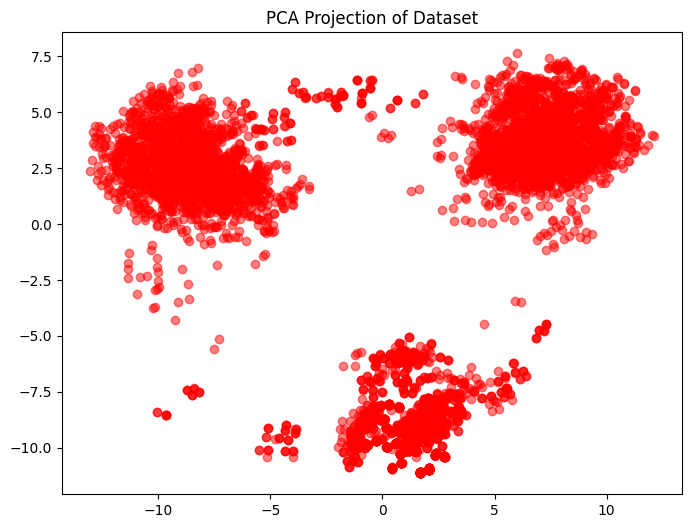

In [ ]:
df = pd.read_csv(file_path)

# Select only numeric columns
df = df.select_dtypes(include=[np.number])

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='red', alpha=0.5)

# Formatting the plot
plt.title("PCA Projection of Dataset")
plt.show()

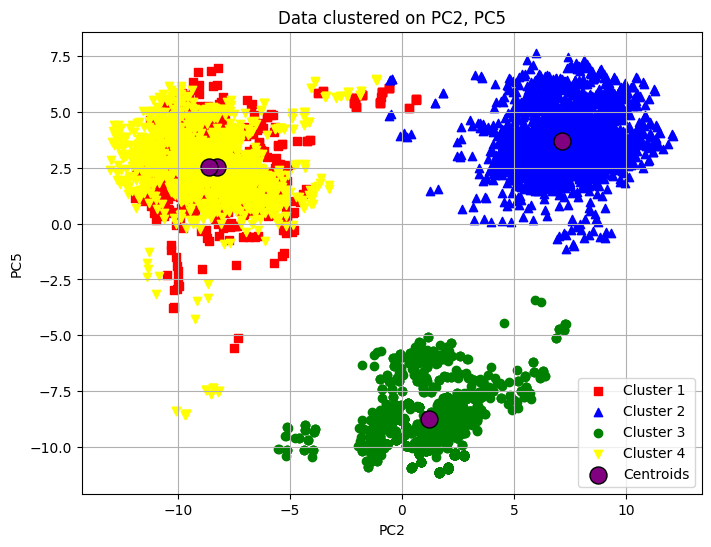

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply PCA (Reduce to 8 components first)
pca = PCA(n_components=8)
data_pca = pca.fit_transform(data_scaled)

# Select PC2 and PC5 for visualization
pc1 = data_pca[:, 0]  # Second principal component
pc2 = data_pca[:, 1]  # Fifth principal component

# Apply K-Means Clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(data_pca)
centroids = kmeans.cluster_centers_[:, [0, 1]]  # Get centroids in PC2, PC5 space

# Plot the clustered data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'yellow']
markers = ['s', '^', 'o', 'v']
for i in range(k):
    plt.scatter(pc1[labels == i], pc2[labels == i], 
                c=colors[i], marker=markers[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='purple', marker='o', s=150, edgecolors='black', label='Centroids')

plt.xlabel('PC2')
plt.ylabel('PC5')
plt.title('Data clustered on PC2, PC5')
plt.legend()
plt.grid()
plt.show()


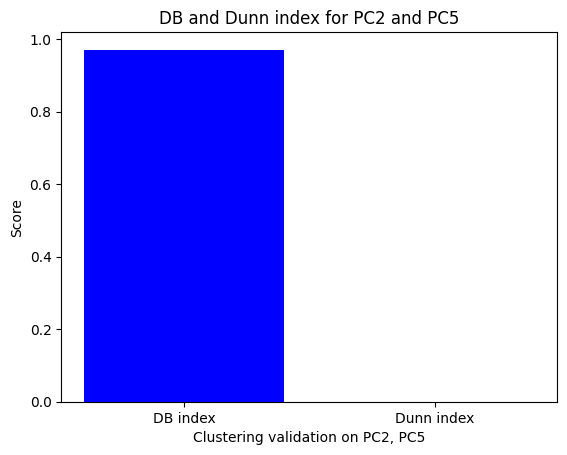

Davies-Bouldin Index: 0.9709646147096211
Dunn Index: 0.0005949671841853241


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA (assuming we need at least 8 components)
pca = PCA(n_components=8)
pca_data = pca.fit_transform(scaled_data)

# Extract PC2 and PC5
selected_components = pca_data[:, [1, 4]]  # PC2 is index 1, PC5 is index 4

# Apply K-Means clustering
k = 4  # Assuming 4 clusters, adjust as needed
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(selected_components)

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(selected_components, labels)

# Compute Dunn Index
def dunn_index(X, labels):
    clusters = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []

    for i in clusters:
        cluster_i = X[labels == i]
        for j in clusters:
            if i != j:
                cluster_j = X[labels == j]
                inter_cluster_distances.append(np.min(cdist(cluster_i, cluster_j)))

        intra_cluster_distances.append(np.max(cdist(cluster_i, cluster_i)))

    return min(inter_cluster_distances) / max(intra_cluster_distances)

dunn_index_value = dunn_index(selected_components, labels)

# Plot validation metrics
metrics = {'DB index': db_index, 'Dunn index': dunn_index_value}
plt.bar(metrics.keys(), metrics.values(), color='blue')
plt.xlabel("Clustering validation on PC2, PC5")
plt.ylabel("Score")
plt.title("DB and Dunn index for PC2 and PC5")
plt.show()

# Print values
print(f"Davies-Bouldin Index: {db_index}")

print(f"Dunn Index: {dunn_index_value}")

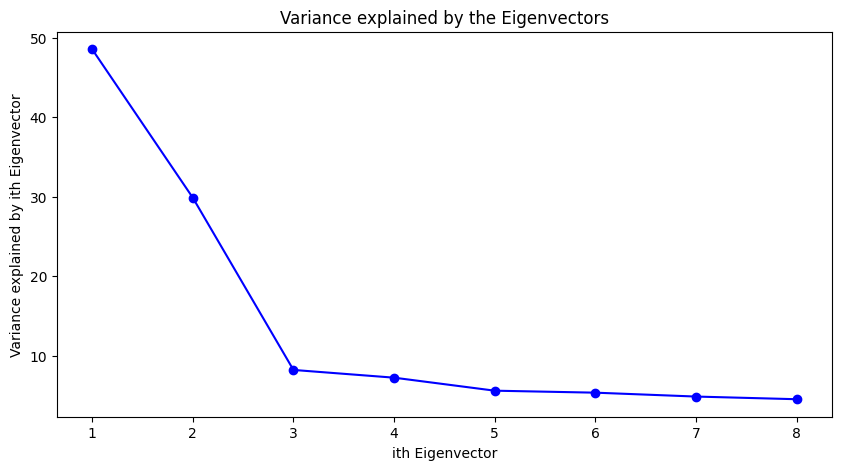

In [ ]:
pca = PCA(n_components=8)
pca_data = pca.fit_transform(scaled_data)
eigenvalues = pca.explained_variance_

#Plot the scree plot of variance explained by eigenvalues
plt.figure(figsize=(10, 5))
plt.scatter(range(1, len(eigenvalues) + 1), eigenvalues, color='b')
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, color='b')
plt.xlabel('ith Eigenvector')
plt.ylabel('Variance explained by ith Eigenvector')
plt.title('Variance explained by the Eigenvectors')
plt.show()
